<a href="https://colab.research.google.com/github/halimahsitti/MINI-PROJECT/blob/main/project_mini_Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [110]:
data_train= pd.read_csv(r"/content/Data_Train oke (1).csv")

In [111]:
pd.set_option('display.max_columns', None)

In [112]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Citilink,6/6/2022,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,8:10,9:50,1h 40m,non-stop,No info,1353379.0
1,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,5:20,6h 45m,2 stops,No info,3058108.0
2,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 AM,33h 10m,2 stops,No info,3193751.0
3,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 PM,9h 10m,2 stops,No info,3193751.0
4,Citilink,6/6/2022,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,8:10,15:40,19h 30m,1 stops,No info,1850880.0


In [113]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          171 non-null    object 
 1   Date_of_Journey  171 non-null    object 
 2   Source           171 non-null    object 
 3   Destination      171 non-null    object 
 4   Route            171 non-null    object 
 5   Dep_Time         171 non-null    object 
 6   Arrival_Time     171 non-null    object 
 7   Duration         171 non-null    object 
 8   Total_Stops      171 non-null    object 
 9   Additional_Info  171 non-null    object 
 10  Price            171 non-null    float64
dtypes: float64(1), object(10)
memory usage: 14.8+ KB


In [114]:
data_train ["Duration"].value_counts()

1h 5m      10
1h 10m      7
6h 50m      5
1h 30m      4
3h 50m      3
           ..
7h 20m      1
27h 20m     1
5h 40m      1
4h 10m      1
36h 25m     1
Name: Duration, Length: 119, dtype: int64

In [115]:
data_train.dropna(inplace = True)

In [116]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [117]:
data_train["Journey_day"] = pd.to_datetime(data_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [118]:
data_train["Journey_month"] = pd.to_datetime(data_train["Date_of_Journey"]).dt.month

In [119]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Citilink,6/6/2022,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,8:10,9:50,1h 40m,non-stop,No info,1353379.0,6,6
1,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,5:20,6h 45m,2 stops,No info,3058108.0,6,6
2,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 AM,33h 10m,2 stops,No info,3193751.0,6,6
3,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 PM,9h 10m,2 stops,No info,3193751.0,6,6
4,Citilink,6/6/2022,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,8:10,15:40,19h 30m,1 stops,No info,1850880.0,6,6


In [120]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [121]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data_train["Dep_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

# Extracting Minutes
data_train["Dep_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [122]:
data_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Citilink,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,9:50,1h 40m,non-stop,No info,1353379.0,6,6,8,10
1,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,5:20,6h 45m,2 stops,No info,3058108.0,6,6,8,10
2,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,4:25:00 AM,33h 10m,2 stops,No info,3193751.0,6,6,8,10
3,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,4:25:00 PM,9h 10m,2 stops,No info,3193751.0,6,6,8,10
4,Citilink,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,15:40,19h 30m,1 stops,No info,1850880.0,6,6,8,10


In [123]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data_train["Arrival_hour"] = pd.to_datetime(data_train.Arrival_Time).dt.hour

# Extracting Minutes
data_train["Arrival_min"] = pd.to_datetime(data_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [124]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Citilink,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,1h 40m,non-stop,No info,1353379.0,6,6,8,10,9,50
1,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,6h 45m,2 stops,No info,3058108.0,6,6,8,10,5,20
2,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,33h 10m,2 stops,No info,3193751.0,6,6,8,10,4,25
3,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,9h 10m,2 stops,No info,3193751.0,6,6,8,10,16,25
4,Citilink,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,19h 30m,1 stops,No info,1850880.0,6,6,8,10,15,40


In [125]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [126]:
# Adding duration_hours and duration_mins list to train_data dataframe

data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins

In [127]:
data_train.drop(["Duration"], axis = 1, inplace = True)

In [128]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Citilink,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,non-stop,No info,1353379.0,6,6,8,10,9,50,1,40
1,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3058108.0,6,6,8,10,5,20,6,45
2,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3193751.0,6,6,8,10,4,25,33,10
3,Citilink-lion,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,2 stops,No info,3193751.0,6,6,8,10,16,25,9,10
4,Citilink,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,1 stops,No info,1850880.0,6,6,8,10,15,40,19,30


In [129]:
data_train["Airline"].value_counts()

Batik Air                           21
Lion Air                            13
Citilink                            12
Batik-Wings                          9
Lion-Citilink                        8
Super Air Jet-Citilink               8
Batik-Citilink                       8
Citilink-Garuda                      6
Lion                                 6
Citilink-lion                        5
Citilink-Batik Air                   5
Super Air Jet                        5
lion air                             4
Citilik                              4
Wigs Air                             4
Lion Air-Citilink                    4
Garuda-Citilink                      4
Lion-Wings                           3
Citilink-Lion                        3
Garuda indonesia                     3
Susi Air                             2
Garuda                               2
Citilink-Super Air Jet-Wings Air     2
Garuda-Lion                          2
Citilink-Super Air Jet               2
Batik Air-Citilink       

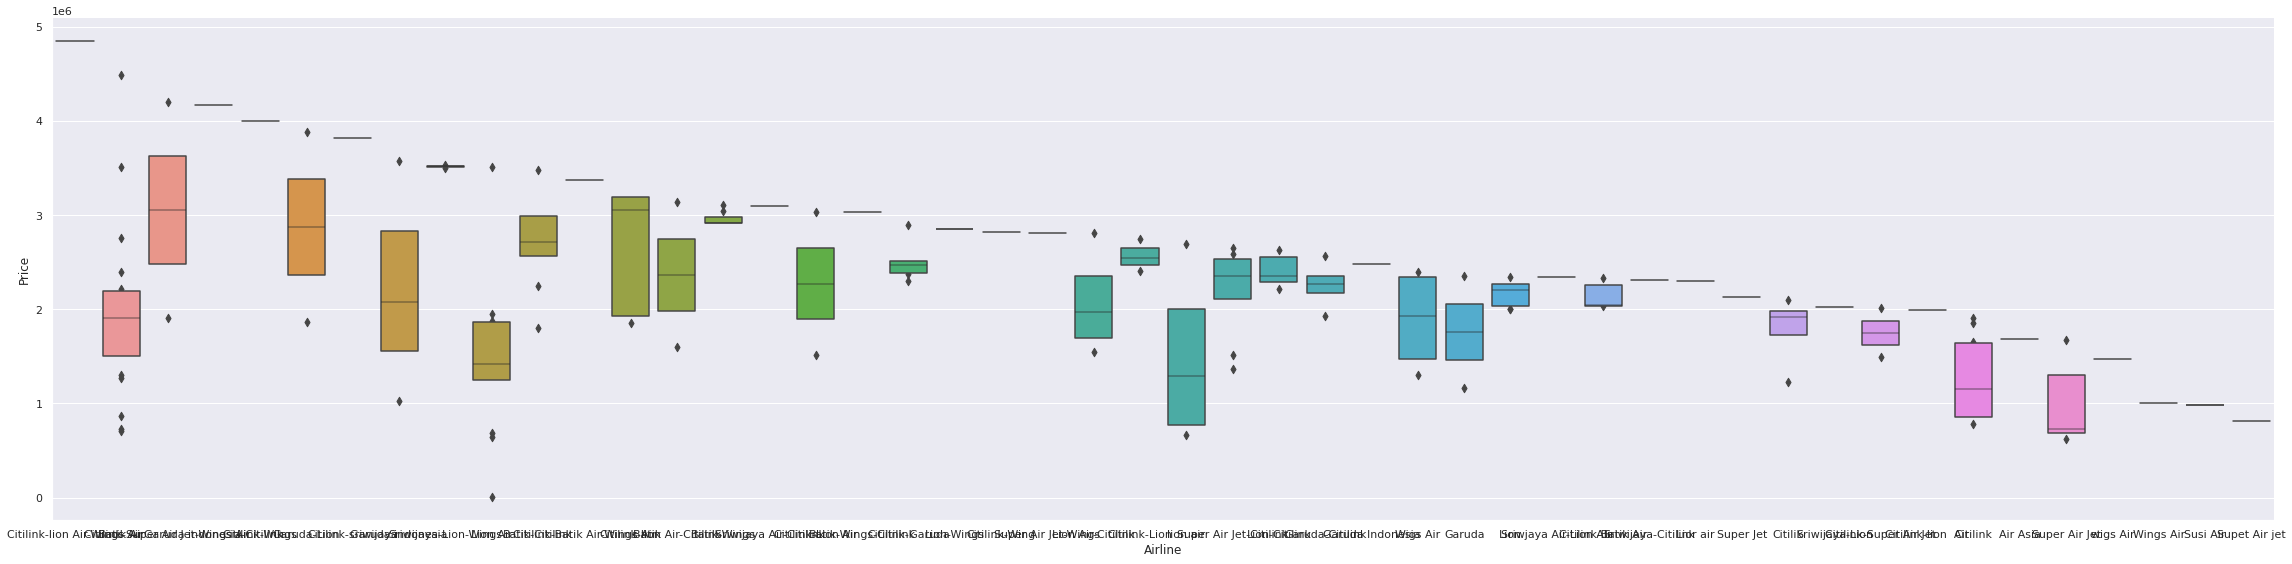

In [135]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 4)
plt.show()

In [138]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Batik Air,Airline_Batik Air-Citilink,Airline_Batik-Citilink,Airline_Batik-Wings,Airline_Batik-Wings-Citilink,Airline_Citilik,Airline_Citilink,Airline_Citilink-Batik Air,Airline_Citilink-Batik Air-Wings Air,Airline_Citilink-Garuda,Airline_Citilink-Lion,Airline_Citilink-Lion Air,Airline_Citilink-Super Air Jet,Airline_Citilink-Super Air Jet-Wings Air,Airline_Citilink-Wing,Airline_Citilink-Wings,Airline_Citilink-lion,Airline_Citilink-lion Air,Airline_Citilink-lion Air-Wings Air,Airline_Citilink-sriwijaya,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Garuda indonesia-Citilink,Airline_Garuda-Citilink,Airline_Garuda-Lion,Airline_Lion,Airline_Lion Air,Airline_Lion Air-Citilink,Airline_Lion-Citilink,Airline_Lion-Wings,Airline_Lior air,Airline_Sriwijaya Air-Citilink,Airline_Sriwijaya-Citilink,Airline_Sriwijaya-Lion,Airline_Sriwijaya-Lion-Wings,Airline_Sriwjaya Air-Lion Air,Airline_Super Air Jet,Airline_Super Air Jet-Citilink,Airline_Super Air Jet-Wings,Airline_Super Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wigs Air,Airline_Wings Air,Airline_lion air,Airline_wigs Air
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
data_train["Source"].value_counts()

Jakarta (Soekarno Hatta Internasional Airport)    47
Semarang                                          36
Banyuwangi (blimbingsari)                         26
Yogyakarta (YIA)                                  24
Surabaya (Juanda)                                 11
Malang (Abdul Rachmat saleh)                       9
Yogyakarta ( adisutjipto)                          7
Solo                                               7
Cilacap (CXP)                                      3
Karimunjawa (KWB)                                  1
Name: Source, dtype: int64

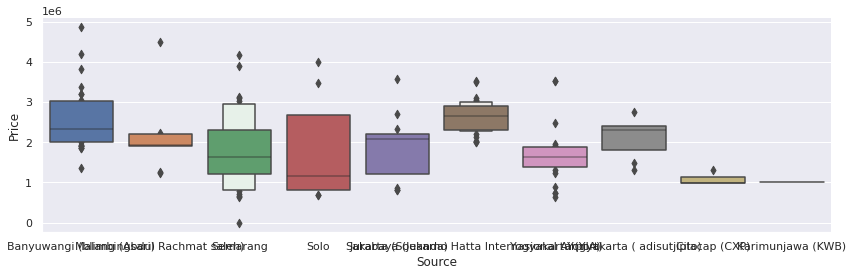

In [140]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [141]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Cilacap (CXP),Source_Jakarta (Soekarno Hatta Internasional Airport),Source_Karimunjawa (KWB),Source_Malang (Abdul Rachmat saleh),Source_Semarang,Source_Solo,Source_Surabaya (Juanda),Source_Yogyakarta ( adisutjipto),Source_Yogyakarta (YIA)
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


In [143]:
data_train["Destination"].value_counts()

Bandung                                          60
Jakarta (Soekarno Hatta Internasional Airport    13
Yogyakarta                                       13
Solo                                              8
Jakarta (CGK)                                     8
Semarang                                          6
Surabaya (SUB)                                    6
jawa Tengah (Ahmad yani )                         6
Semarang (SRG)                                    6
Sidoarjo                                          5
Malang                                            5
Tangerang (Soekarno hatta )                       5
Surabaya (Juanda)                                 5
Bandung (Husein Sastranegara)                     4
Banyuwangi                                        3
Tangerang(Soekarno hatta )                        3
Yogyakarta (YIA)                                  3
Solo (SOC)                                        3
Jawa barat (Soekarno hatta )                      2
Banyuwangi (

In [144]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Bandung (BDO),Destination_Bandung (Husein Sastranegara),Destination_Banyuwangi,Destination_Banyuwangi (BWX),Destination_Jakarta (CGK),Destination_Jakarta (Soekarno Hatta Internasional Airport,Destination_Jawa Tengah (Adisumarmo),Destination_Jawa barat (Soekarno hatta ),Destination_Malang,Destination_Malang (MLG),Destination_Semarang,Destination_Semarang (SRG),Destination_Sidoarjo,Destination_Solo,Destination_Solo (SOC),Destination_Surabaya (Juanda),Destination_Surabaya (SUB),Destination_Tangerang (Soekarno hatta ),Destination_Tangerang(Soekarno hatta ),Destination_Yogyakarta,Destination_Yogyakarta (YIA),Destination_Yogyakarta (adisutjipto),Destination_jawa Tengah (Ahmad yani )
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
data_train["Route"]

0               BWX→ CGK
1      BWX→ CGK →DPS→BDO
2      BWX→ CGK →DPS→BDO
3      BWX→ CGK →DPS→BDO
4        BWX → CGK → SRG
             ...        
166            YIA → BDO
167            CXP → CGK
168            CXP → SRG
169            CXP → CGK
170            KWB → SUB
Name: Route, Length: 171, dtype: object

In [146]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
data_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [147]:
data_train["Total_Stops"].value_counts()

1 stops     109
non-stop     31
2 stops      28
3 stops       2
1 stop        1
Name: Total_Stops, dtype: int64

In [148]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
data_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [149]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Citilink,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,0,1353379.0,6,6,8,10,9,50,1,40
1,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3058108.0,6,6,8,10,5,20,6,45
2,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3193751.0,6,6,8,10,4,25,33,10
3,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3193751.0,6,6,8,10,16,25,9,10
4,Citilink,Banyuwangi (blimbingsari),Semarang,1 stops,1850880.0,6,6,8,10,15,40,19,30


In [150]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([data_train, Airline, Source, Destination], axis = 1)

In [151]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik Air,Airline_Batik Air-Citilink,Airline_Batik-Citilink,Airline_Batik-Wings,Airline_Batik-Wings-Citilink,Airline_Citilik,Airline_Citilink,Airline_Citilink-Batik Air,Airline_Citilink-Batik Air-Wings Air,Airline_Citilink-Garuda,Airline_Citilink-Lion,Airline_Citilink-Lion Air,Airline_Citilink-Super Air Jet,Airline_Citilink-Super Air Jet-Wings Air,Airline_Citilink-Wing,Airline_Citilink-Wings,Airline_Citilink-lion,Airline_Citilink-lion Air,Airline_Citilink-lion Air-Wings Air,Airline_Citilink-sriwijaya,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Garuda indonesia-Citilink,Airline_Garuda-Citilink,Airline_Garuda-Lion,Airline_Lion,Airline_Lion Air,Airline_Lion Air-Citilink,Airline_Lion-Citilink,Airline_Lion-Wings,Airline_Lior air,Airline_Sriwijaya Air-Citilink,Airline_Sriwijaya-Citilink,Airline_Sriwijaya-Lion,Airline_Sriwijaya-Lion-Wings,Airline_Sriwjaya Air-Lion Air,Airline_Super Air Jet,Airline_Super Air Jet-Citilink,Airline_Super Air Jet-Wings,Airline_Super Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wigs Air,Airline_Wings Air,Airline_lion air,Airline_wigs Air,Source_Cilacap (CXP),Source_Jakarta (Soekarno Hatta Internasional Airport),Source_Karimunjawa (KWB),Source_Malang (Abdul Rachmat saleh),Source_Semarang,Source_Solo,Source_Surabaya (Juanda),Source_Yogyakarta ( adisutjipto),Source_Yogyakarta (YIA),Destination_Bandung (BDO),Destination_Bandung (Husein Sastranegara),Destination_Banyuwangi,Destination_Banyuwangi (BWX),Destination_Jakarta (CGK),Destination_Jakarta (Soekarno Hatta Internasional Airport,Destination_Jawa Tengah (Adisumarmo),Destination_Jawa barat (Soekarno hatta ),Destination_Malang,Destination_Malang (MLG),Destination_Semarang,Destination_Semarang (SRG),Destination_Sidoarjo,Destination_Solo,Destination_Solo (SOC),Destination_Surabaya (Juanda),Destination_Surabaya (SUB),Destination_Tangerang (Soekarno hatta ),Destination_Tangerang(Soekarno hatta ),Destination_Yogyakarta,Destination_Yogyakarta (YIA),Destination_Yogyakarta (adisutjipto),Destination_jawa Tengah (Ahmad yani )
0,Citilink,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,0,1353379.0,6,6,8,10,9,50,1,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3058108.0,6,6,8,10,5,20,6,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3193751.0,6,6,8,10,4,25,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Citilink-lion,Banyuwangi (blimbingsari),Bandung,2,3193751.0,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Citilink,Banyuwangi (blimbingsari),Semarang,1 stops,1850880.0,6,6,8,10,15,40,19,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [152]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [153]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik Air,Airline_Batik Air-Citilink,Airline_Batik-Citilink,Airline_Batik-Wings,Airline_Batik-Wings-Citilink,Airline_Citilik,Airline_Citilink,Airline_Citilink-Batik Air,Airline_Citilink-Batik Air-Wings Air,Airline_Citilink-Garuda,Airline_Citilink-Lion,Airline_Citilink-Lion Air,Airline_Citilink-Super Air Jet,Airline_Citilink-Super Air Jet-Wings Air,Airline_Citilink-Wing,Airline_Citilink-Wings,Airline_Citilink-lion,Airline_Citilink-lion Air,Airline_Citilink-lion Air-Wings Air,Airline_Citilink-sriwijaya,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Garuda indonesia-Citilink,Airline_Garuda-Citilink,Airline_Garuda-Lion,Airline_Lion,Airline_Lion Air,Airline_Lion Air-Citilink,Airline_Lion-Citilink,Airline_Lion-Wings,Airline_Lior air,Airline_Sriwijaya Air-Citilink,Airline_Sriwijaya-Citilink,Airline_Sriwijaya-Lion,Airline_Sriwijaya-Lion-Wings,Airline_Sriwjaya Air-Lion Air,Airline_Super Air Jet,Airline_Super Air Jet-Citilink,Airline_Super Air Jet-Wings,Airline_Super Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wigs Air,Airline_Wings Air,Airline_lion air,Airline_wigs Air,Source_Cilacap (CXP),Source_Jakarta (Soekarno Hatta Internasional Airport),Source_Karimunjawa (KWB),Source_Malang (Abdul Rachmat saleh),Source_Semarang,Source_Solo,Source_Surabaya (Juanda),Source_Yogyakarta ( adisutjipto),Source_Yogyakarta (YIA),Destination_Bandung (BDO),Destination_Bandung (Husein Sastranegara),Destination_Banyuwangi,Destination_Banyuwangi (BWX),Destination_Jakarta (CGK),Destination_Jakarta (Soekarno Hatta Internasional Airport,Destination_Jawa Tengah (Adisumarmo),Destination_Jawa barat (Soekarno hatta ),Destination_Malang,Destination_Malang (MLG),Destination_Semarang,Destination_Semarang (SRG),Destination_Sidoarjo,Destination_Solo,Destination_Solo (SOC),Destination_Surabaya (Juanda),Destination_Surabaya (SUB),Destination_Tangerang (Soekarno hatta ),Destination_Tangerang(Soekarno hatta ),Destination_Yogyakarta,Destination_Yogyakarta (YIA),Destination_Yogyakarta (adisutjipto),Destination_jawa Tengah (Ahmad yani )
0,0,1353379.0,6,6,8,10,9,50,1,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3058108.0,6,6,8,10,5,20,6,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3193751.0,6,6,8,10,4,25,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,3193751.0,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1 stops,1850880.0,6,6,8,10,15,40,19,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
data_train.shape

(171, 89)

## **TEST SET**

In [155]:
test_data = pd.read_csv(r"/content/Data_Train oke (1).csv")

In [156]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Citilink,6/6/2022,Banyuwangi (blimbingsari),Jakarta (Soekarno Hatta Internasional Airport,BWX→ CGK,8:10,9:50,1h 40m,non-stop,No info,1353379.0
1,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,5:20,6h 45m,2 stops,No info,3058108.0
2,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 AM,33h 10m,2 stops,No info,3193751.0
3,Citilink-lion,6/6/2022,Banyuwangi (blimbingsari),Bandung,BWX→ CGK →DPS→BDO,8:10,4:25:00 PM,9h 10m,2 stops,No info,3193751.0
4,Citilink,6/6/2022,Banyuwangi (blimbingsari),Semarang,BWX → CGK → SRG,8:10,15:40,19h 30m,1 stops,No info,1850880.0


In [157]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          171 non-null    object 
 1   Date_of_Journey  171 non-null    object 
 2   Source           171 non-null    object 
 3   Destination      171 non-null    object 
 4   Route            171 non-null    object 
 5   Dep_Time         171 non-null    object 
 6   Arrival_Time     171 non-null    object 
 7   Duration         171 non-null    object 
 8   Total_Stops      171 non-null    object 
 9   Additional_Info  171 non-null    object 
 10  Price            171 non-null    float64
dtypes: float64(1), object(10)
memory usage: 14.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source       

In [158]:
data_test.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Batik Air,Batik Air-Citilink,Batik-Citilink,Batik-Wings,Batik-Wings-Citilink,Citilik,Citilink,Citilink-Batik Air,Citilink-Batik Air-Wings Air,Citilink-Garuda,Citilink-Lion,Citilink-Lion Air,Citilink-Super Air Jet,Citilink-Super Air Jet-Wings Air,Citilink-Wing,Citilink-Wings,Citilink-lion,Citilink-lion Air,Citilink-lion Air-Wings Air,Citilink-sriwijaya,Garuda,Garuda Indonesia,Garuda indonesia,Garuda indonesia-Citilink,Garuda-Citilink,Garuda-Lion,Lion,Lion Air,Lion Air-Citilink,Lion-Citilink,Lion-Wings,Lior air,Sriwijaya Air-Citilink,Sriwijaya-Citilink,Sriwijaya-Lion,Sriwijaya-Lion-Wings,Sriwjaya Air-Lion Air,Super Air Jet,Super Air Jet-Citilink,Super Air Jet-Wings,Super Jet,Supet Air jet,Susi Air,Wigs Air,Wings Air,lion air,wigs Air,Cilacap (CXP),Jakarta (Soekarno Hatta Internasional Airport),Karimunjawa (KWB),Malang (Abdul Rachmat saleh),Semarang,Solo,Surabaya (Juanda),Yogyakarta ( adisutjipto),Yogyakarta (YIA),Bandung (BDO),Bandung (Husein Sastranegara),Banyuwangi,Banyuwangi (BWX),Jakarta (CGK),Jakarta (Soekarno Hatta Internasional Airport,Jawa Tengah (Adisumarmo),Jawa barat (Soekarno hatta ),Malang,Malang (MLG),Semarang,Semarang (SRG),Sidoarjo,Solo,Solo (SOC),Surabaya (Juanda),Surabaya (SUB),Tangerang (Soekarno hatta ),Tangerang(Soekarno hatta ),Yogyakarta,Yogyakarta (YIA),Yogyakarta (adisutjipto),jawa Tengah (Ahmad yani )
0,0,1353379.0,6,6,8,10,9,50,1,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3058108.0,6,6,8,10,5,20,6,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3193751.0,6,6,8,10,4,25,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,3193751.0,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1 stops,1850880.0,6,6,8,10,15,40,19,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# **Feature Selection**
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [159]:
data_train.shape

(171, 89)

In [161]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Batik Air', 'Airline_Batik Air-Citilink',
       'Airline_Batik-Citilink', 'Airline_Batik-Wings',
       'Airline_Batik-Wings-Citilink', 'Airline_Citilik', 'Airline_Citilink',
       'Airline_Citilink-Batik Air', 'Airline_Citilink-Batik Air-Wings Air',
       'Airline_Citilink-Garuda', 'Airline_Citilink-Lion',
       'Airline_Citilink-Lion Air', 'Airline_Citilink-Super Air Jet',
       'Airline_Citilink-Super Air Jet-Wings Air', 'Airline_Citilink-Wing',
       'Airline_Citilink-Wings', 'Airline_Citilink-lion',
       'Airline_Citilink-lion  Air', 'Airline_Citilink-lion Air-Wings Air',
       'Airline_Citilink-sriwijaya', 'Airline_Garuda',
       'Airline_Garuda Indonesia', 'Airline_Garuda indonesia',
       'Airline_Garuda indonesia-Citilink', 'Airline_Garuda-Citilink',
       'Airline_Garuda-Lion', 'Airline_Lion'

In [165]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Batik Air', 'Airline_Batik Air-Citilink',
       'Airline_Batik-Citilink', 'Airline_Batik-Wings',
       'Airline_Batik-Wings-Citilink', 'Airline_Citilik', 'Airline_Citilink',
       'Airline_Citilink-Batik Air', 'Airline_Citilink-Batik Air-Wings Air',
       'Airline_Citilink-Garuda', 'Airline_Citilink-Lion',
       'Airline_Citilink-Lion Air', 'Airline_Citilink-Super Air Jet',
       'Airline_Citilink-Super Air Jet-Wings Air', 'Airline_Citilink-Wing',
       'Airline_Citilink-Wings', 'Airline_Citilink-lion',
       'Airline_Citilink-lion  Air', 'Airline_Citilink-lion Air-Wings Air',
       'Airline_Citilink-sriwijaya', 'Airline_Garuda',
       'Airline_Garuda Indonesia', 'Airline_Garuda indonesia',
       'Airline_Garuda indonesia-Citilink', 'Airline_Garuda-Citilink',
       'Airline_Garuda-Lion', 'Airline_Lion', 'Airline_Lion Air',
       'Airline_Lion Air-Citilink', 'Airline_Lion-Citilink',
       'Airline_Lion-Wings', 'Airline_Lior air',
       'Airline_Sriwijaya Air-Citilink', 'Airline_Sriwijaya-Citilink',
       'Airline_Sriwijaya-Lion', 'Airline_Sriwijaya-Lion-Wings',
       'Airline_Sriwjaya Air-Lion Air', 'Airline_Super Air Jet',
       'Airline_Super Air Jet-Citilink', 'Airline_Super Air Jet-Wings',
       'Airline_Super Jet', 'Airline_Supet Air jet', 'Airline_Susi Air',
       'Airline_Wigs Air', 'Airline_Wings Air', 'Airline_lion air',
       'Airline_wigs Air', 'Source_Cilacap (CXP)',
       'Source_Jakarta (Soekarno Hatta Internasional Airport)',
       'Source_Karimunjawa (KWB)', 'Source_Malang (Abdul Rachmat saleh)',
       'Source_Semarang', 'Source_Solo', 'Source_Surabaya (Juanda)',
       'Source_Yogyakarta ( adisutjipto)', 'Source_Yogyakarta (YIA)',
       'Destination_Bandung (BDO)',
       'Destination_Bandung (Husein Sastranegara)', 'Destination_Banyuwangi',
       'Destination_Banyuwangi (BWX)', 'Destination_Jakarta (CGK)',
       'Destination_Jakarta (Soekarno Hatta Internasional Airport',
       'Destination_Jawa Tengah (Adisumarmo)',
       'Destination_Jawa barat (Soekarno hatta ) ', 'Destination_Malang',
       'Destination_Malang (MLG)', 'Destination_Semarang',
       'Destination_Semarang (SRG)', 'Destination_Sidoarjo',
       'Destination_Solo', 'Destination_Solo (SOC)',
       'Destination_Surabaya (Juanda)', 'Destination_Surabaya (SUB)',
       'Destination_Tangerang (Soekarno hatta ) ',
       'Destination_Tangerang(Soekarno hatta ) ', 'Destination_Yogyakarta',
       'Destination_Yogyakarta (YIA)', 'Destination_Yogyakarta (adisutjipto)',
       'Destination_jawa Tengah (Ahmad yani )']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Batik Air,Airline_Batik Air-Citilink,Airline_Batik-Citilink,Airline_Batik-Wings,Airline_Batik-Wings-Citilink,Airline_Citilik,Airline_Citilink,Airline_Citilink-Batik Air,Airline_Citilink-Batik Air-Wings Air,Airline_Citilink-Garuda,Airline_Citilink-Lion,Airline_Citilink-Lion Air,Airline_Citilink-Super Air Jet,Airline_Citilink-Super Air Jet-Wings Air,Airline_Citilink-Wing,Airline_Citilink-Wings,Airline_Citilink-lion,Airline_Citilink-lion Air,Airline_Citilink-lion Air-Wings Air,Airline_Citilink-sriwijaya,Airline_Garuda,Airline_Garuda Indonesia,Airline_Garuda indonesia,Airline_Garuda indonesia-Citilink,Airline_Garuda-Citilink,Airline_Garuda-Lion,Airline_Lion,Airline_Lion Air,Airline_Lion Air-Citilink,Airline_Lion-Citilink,Airline_Lion-Wings,Airline_Lior air,Airline_Sriwijaya Air-Citilink,Airline_Sriwijaya-Citilink,Airline_Sriwijaya-Lion,Airline_Sriwijaya-Lion-Wings,Airline_Sriwjaya Air-Lion Air,Airline_Super Air Jet,Airline_Super Air Jet-Citilink,Airline_Super Air Jet-Wings,Airline_Super Jet,Airline_Supet Air jet,Airline_Susi Air,Airline_Wigs Air,Airline_Wings Air,Airline_lion air,Airline_wigs Air,Source_Cilacap (CXP),Source_Jakarta (Soekarno Hatta Internasional Airport),Source_Karimunjawa (KWB),Source_Malang (Abdul Rachmat saleh),Source_Semarang,Source_Solo,Source_Surabaya (Juanda),Source_Yogyakarta ( adisutjipto),Source_Yogyakarta (YIA),Destination_Bandung (BDO),Destination_Bandung (Husein Sastranegara),Destination_Banyuwangi,Destination_Banyuwangi (BWX),Destination_Jakarta (CGK),Destination_Jakarta (Soekarno Hatta Internasional Airport,Destination_Jawa Tengah (Adisumarmo),Destination_Jawa barat (Soekarno hatta ),Destination_Malang,Destination_Malang (MLG),Destination_Semarang,Destination_Semarang (SRG),Destination_Sidoarjo,Destination_Solo,Destination_Solo (SOC),Destination_Surabaya (Juanda),Destination_Surabaya (SUB),Destination_Tangerang (Soekarno hatta ),Destination_Tangerang(Soekarno hatta ),Destination_Yogyakarta,Destination_Yogyakarta (YIA),Destination_Yogyakarta (adisutjipto),Destination_jawa Tengah (Ahmad yani )
0,0,6,6,8,10,9,50,1,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,6,6,8,10,5,20,6,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,6,6,8,10,4,25,33,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,6,6,8,10,16,25,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1 stops,6,6,8,10,15,40,19,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
y = data_train.iloc[:, 1]
y.head()

0    1353379.0
1    3058108.0
2    3193751.0
3    3193751.0
4    1850880.0
Name: Price, dtype: float64

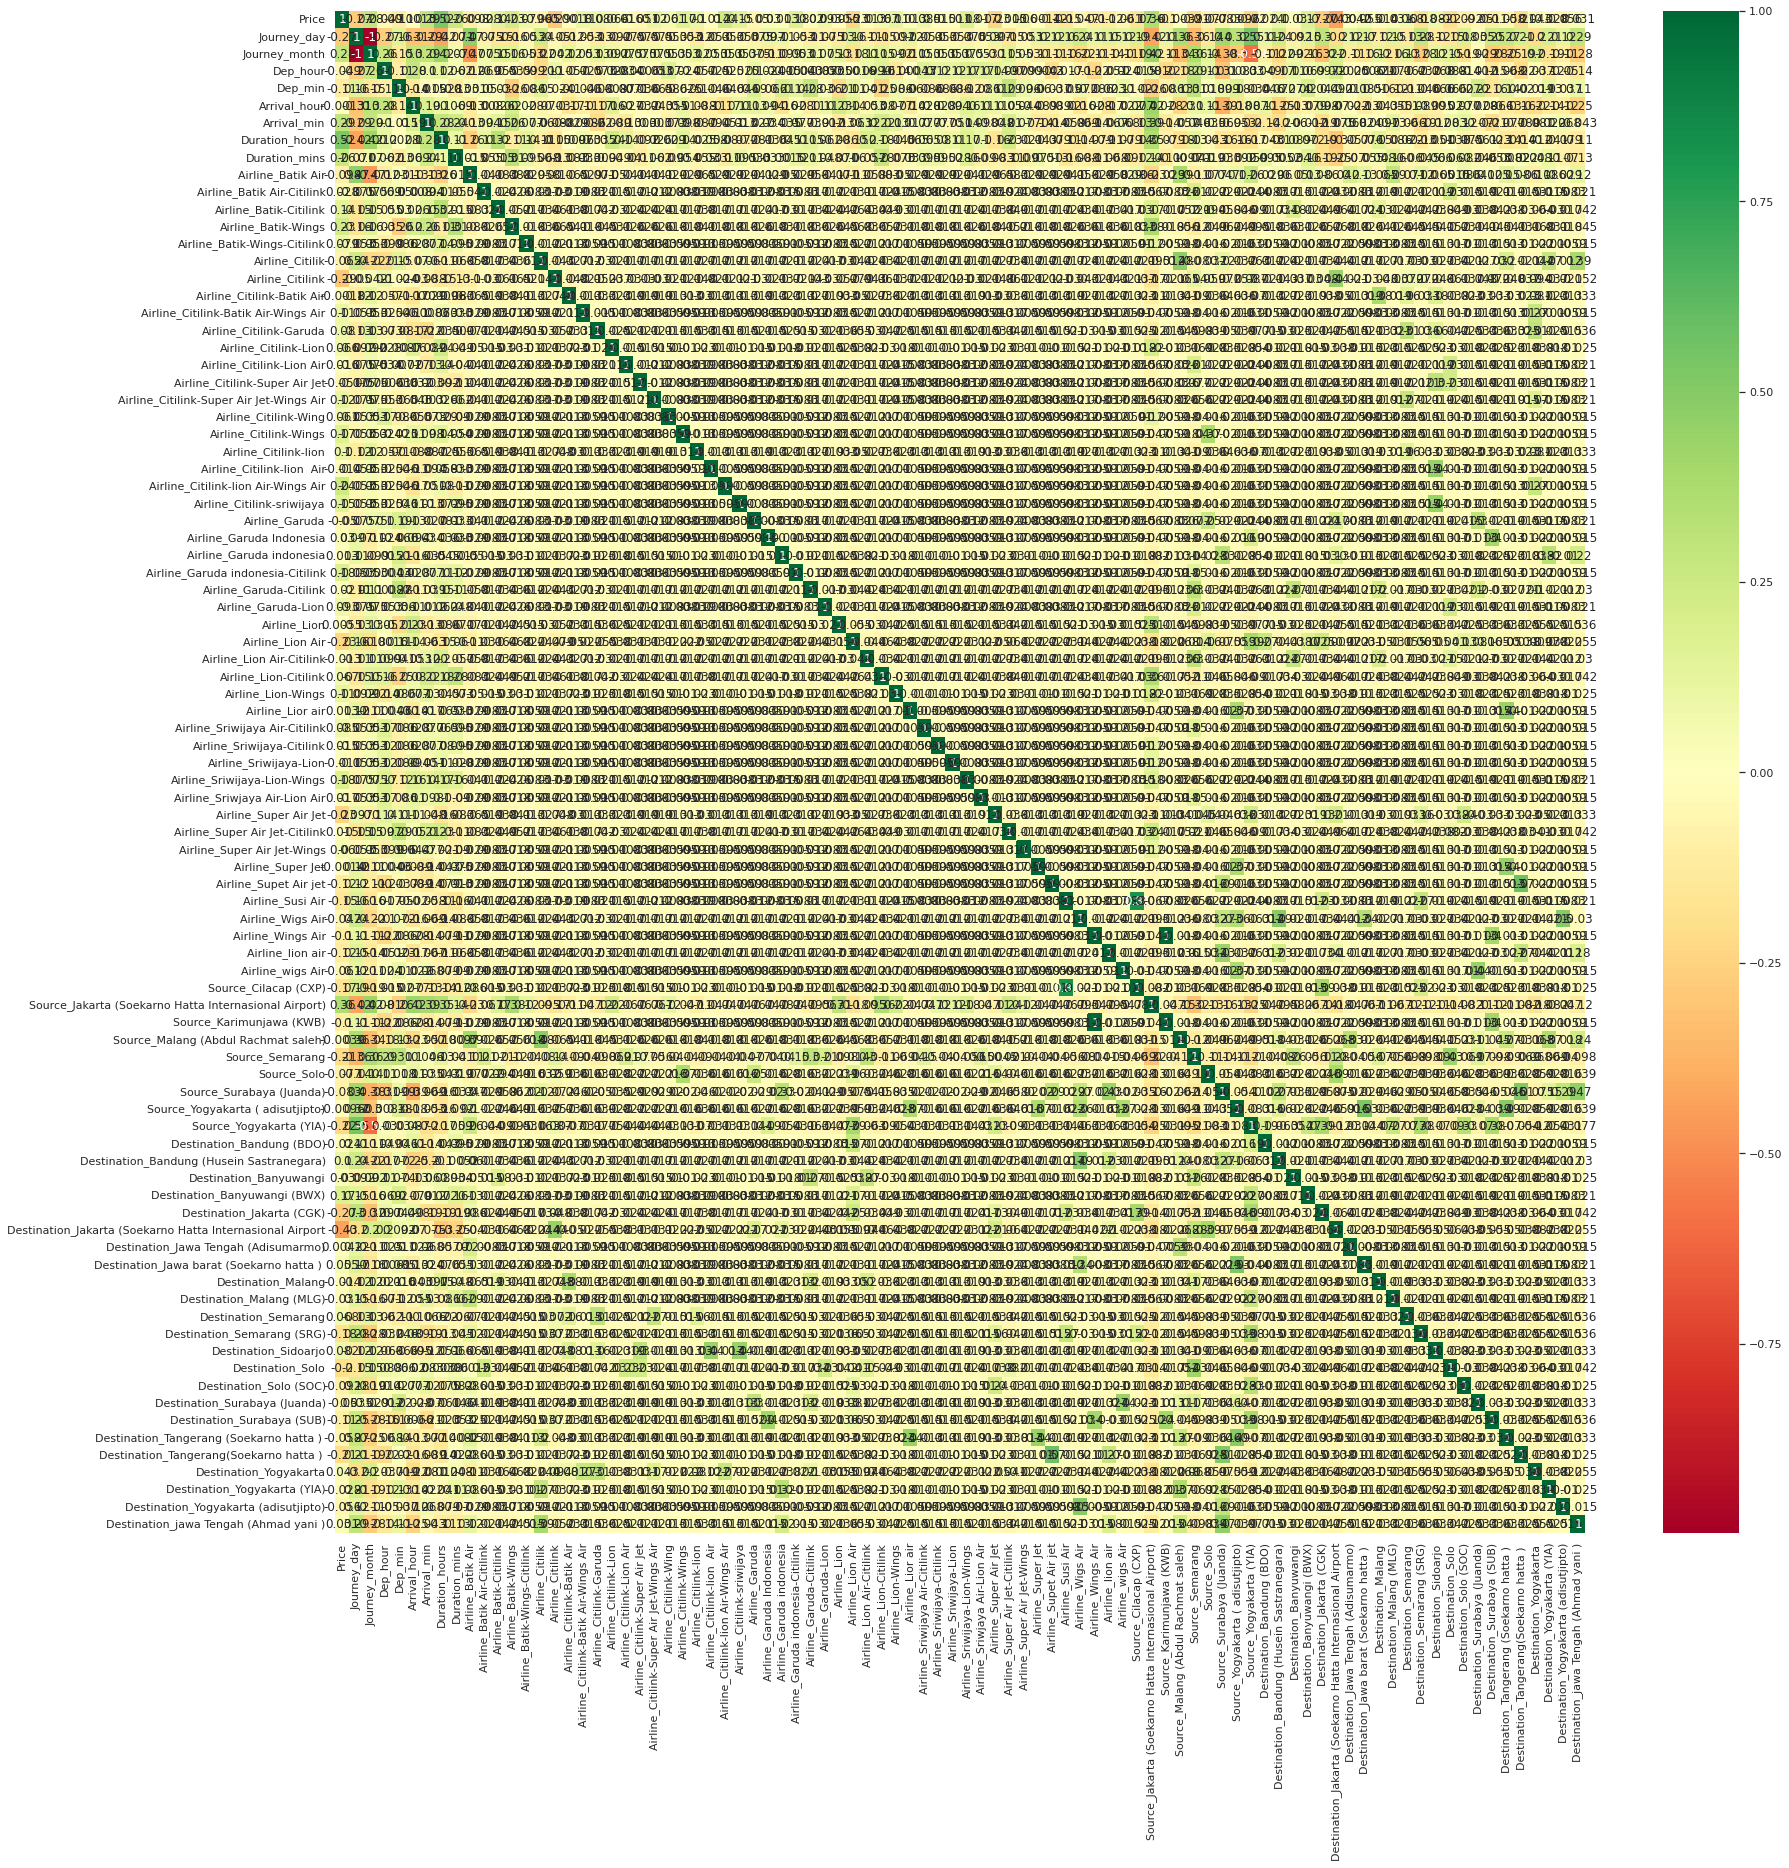

In [168]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (28,28))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [173]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ValueError: ignored

In [170]:
print(selection.feature_importances_)

AttributeError: ignored

In [89]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

NotFittedError: ignored

<Figure size 864x576 with 0 Axes>

# **Fitting model using Random Forest**
1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
*   Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

NameError: ignored

In [92]:
y_pred = reg_rf.predict(X_test)

NameError: ignored

In [ ]:
reg_rf.score(X_train, y_train)

In [ ]:
reg_rf.score(X_test, y_test)

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

In [ ]:
metrics.r2_score(y_test, y_pred)

# **Hyperparameter Tuning**
1. Choose following method for hyperparameter tuning
*   RandomizedSearchCV --> Fast
*   GridSearchCV
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [95]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [96]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [97]:
rf_random.fit(X_train,y_train)

NameError: ignored

In [98]:
rf_random.best_params_

AttributeError: ignored

In [99]:
prediction = rf_random.predict(X_test)

NameError: ignored

In [100]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

NameError: ignored

<Figure size 576x576 with 0 Axes>

In [101]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

NameError: ignored

<Figure size 576x576 with 0 Axes>

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

NameError: ignored

# Save the model to reuse it again

In [103]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [104]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

EOFError: ignored

In [105]:
y_prediction = forest.predict(X_test)

NameError: ignored

In [106]:
metrics.r2_score(y_test, y_prediction)

NameError: ignored